In [145]:
# import necessary packages
import h5py
from matplotlib.colors import XKCD_COLORS, TABLEAU_COLORS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [146]:
# necessary file paths
ALDH1A1_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\aldh1a1.xlsx"
ALDH1L1_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\aldh1l1.xlsx"
ASSAY_LIST_FILE = (
    "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\assay-list-olink-explore-3072.xlsx"
)
CD63_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\cd63.xlsx"
CSF_GREATER_NPX_PATH = (
    "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\csf_greater_npx.xlsx"
)
FKBP5_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\fkbp5.xlsx"
GFAP_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\gfap.xlsx"
HPA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\has_protein_data_in_Cell.tsv"
MANIFEST_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\Shah (BWH)_OLINK_SK-5T4V_2023-06-27_MN UPDATES 82823.xlsx"
NEFL_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\nefl.xlsx"
NRXN3_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\nrxn3.xlsx"
PLASMA_GREATER_NPX_PATH = (
    "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\plasma_greater_npx.xlsx"
)
PLATE_LAYOUT_FILE = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\Plate Layout.xlsx"
RAW_DATA_FILE = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\LCSET_28343_10-4-2023_EXTENDED_NPX_2023-10-20.csv"
SEC_DATA_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\OLINK Analysis_2.xlsx"

# lists
CONTROL_TARGETS = [
    "ALDH1A1",
    "CD63",
    "FKBP5",
    "GFAP",
    "NEFL",
    "NRXN3",
]
CSF_SAMPLE_BARCODES = [
    "8351",
    "8376",
    "8395",
    "8439",
    "8275",
    "8630",
    "8627",
    "8781",
]
CSF_SAMPLE_NUMBERS = ["CSF1", "CSF2", "CSF3", "CSF4", "CSF5", "CSF6", "CSF7", "CSF8"]
PANELS = [
    "Cardiometabolic",
    "Cardiometabolic_II",
    "Inflammation",
    "Inflammation_II",
    "Neurology",
    "Neurology_II",
    "Oncology",
    "Oncology_II",
]
UNIMPORTANT_COLUMNS = [
    "Index",
    "OlinkID",
    "Panel_Lot_Nr",
    "PlateID",
    "WellID",
    "Normalization",
    "Processing_StartDate",
    "Processing_EndDate",
    "AnalyzerID",
    "ExploreVersion",
]
X_AXIS_ORDER = [
    "Fract 6",
    "Fract 7",
    "Fract 8",
    "Fract 9",
    "Fract 10",
    "Fract 11",
    "Fract 12",
    "Fract 13",
    "Fract 14",
    "Fract 15",
]

# global variable
SIGNIFICANCE_VALUE = 0.05

In [147]:
# clean up the raw olink data file and map the sample locations to their barcodes

assay_list = pd.read_excel(ASSAY_LIST_FILE)
plate_layout = pd.read_excel(PLATE_LAYOUT_FILE)
raw_data = pd.read_csv(RAW_DATA_FILE, sep=";")
manifest = pd.read_excel(MANIFEST_PATH)

# raw_data["SampleID"] = raw_data["SampleID"].astype(str).str.strip()
# manifest["SampleID"] = manifest["SampleID"].astype(str).str.strip()

raw_data = raw_data.drop(UNIMPORTANT_COLUMNS, axis=1)

sample_location_dict = dict(zip(manifest.SampleID, manifest.Broad_Sample_ID))
raw_data["Location"] = raw_data["SampleID"].map(sample_location_dict)

layout_dict = dict(zip(plate_layout.Location, plate_layout.Sample))
layout_dict2 = dict(zip(plate_layout.Location, plate_layout.Additional_info))
layout_dict3 = dict(zip(plate_layout.Location, plate_layout.CSF_sample))

raw_data["Sample Description"] = raw_data["Location"].map(layout_dict)
raw_data["Additional Information"] = raw_data["Location"].map(layout_dict2)
raw_data["Sample Number"] = raw_data["Location"].map(layout_dict3)


def make_linear(x):
    return 2**x


raw_data["Linear NPX"] = raw_data["NPX"].map(make_linear)

In [162]:
epcam = target_search("EPCAM")

In [163]:
epcam

,SampleID,Sample_Type,UniProt,Assay,MissingFreq,Panel,QC_Warning,LOD,NPX,Assay_Warning,IntraCV,InterCV,Location,Sample Description,Additional Information,Sample Number,Linear NPX
67776,SM-N8JPG,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,-2.9212,PASS,7.4469,7.4469,A01,Fract 6,Healthy CSF SEC,CSF1,0.132017
67777,SM-N8JPM,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,1.8553,PASS,7.4469,7.4469,A07,Fract 12,Healthy CSF SEC,CSF1,3.618270
67778,SM-N8JPH,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,-1.5604,PASS,7.4469,7.4469,A02,Fract 7,Healthy CSF SEC,CSF1,0.339057
67779,SM-N8JPN,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,3.4066,PASS,7.4469,7.4469,A08,Fract 13,Healthy CSF SEC,CSF1,10.604465
67780,SM-N8JPI,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,-1.0518,PASS,7.4469,7.4469,A03,Fract 8,Healthy CSF SEC,CSF1,0.482366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67867,SM-N8JS4,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,2.4452,PASS,7.4469,7.4469,H10,Fract 15,AD CSF SEC,CSF8,5.446011
67868,SM-N8JRY,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,-0.4382,PASS,7.4469,7.4469,H05,Fract 10,AD CSF SEC,CSF8,0.738055
67869,SM-N8JS5,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,2.4806,PASS,7.4469,7.4469,H11,Plasma D Internal EV,EV internal cargo in plasma,Plasma D Internal EV,5.581295
67870,SM-N8JRZ,SAMPLE,P16422,EPCAM,0.1477,Inflammation,PASS,-1.0718,-0.4981,PASS,7.4469,7.4469,H06,Fract 11,AD CSF SEC,CSF8,0.708039


In [164]:
epcam.to_excel("C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\epcam.xlsx")

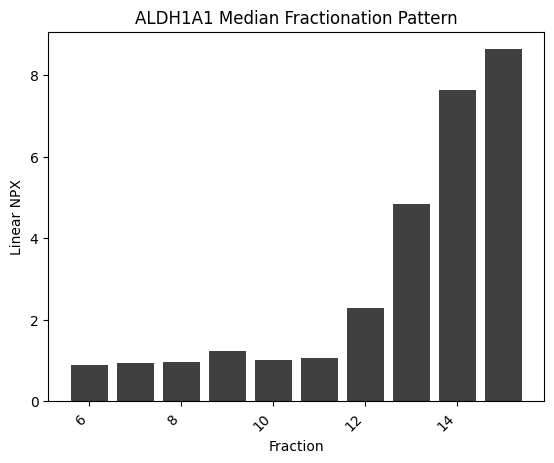

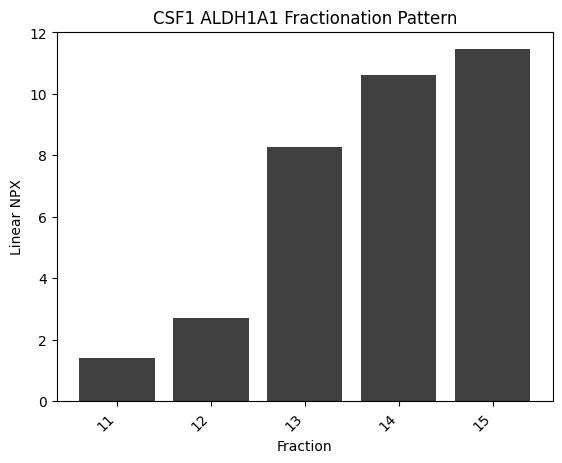

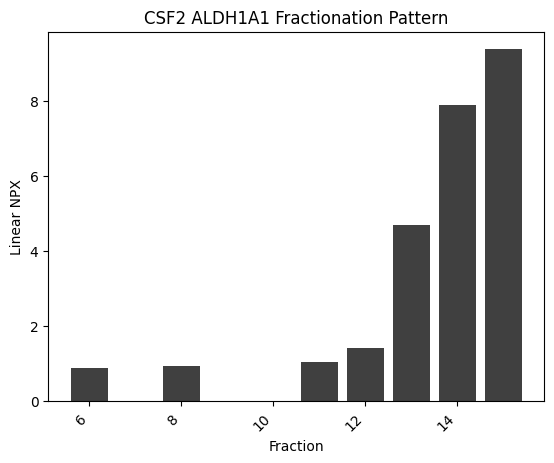

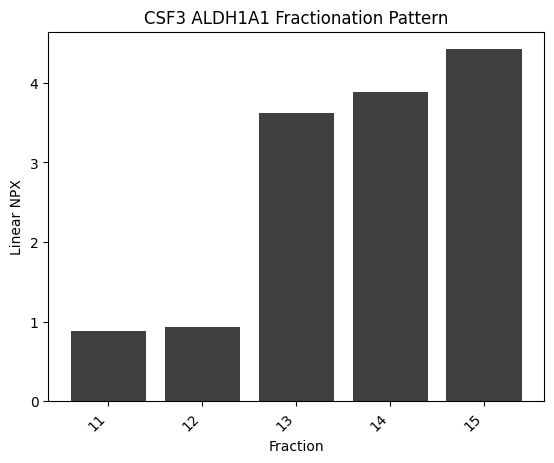

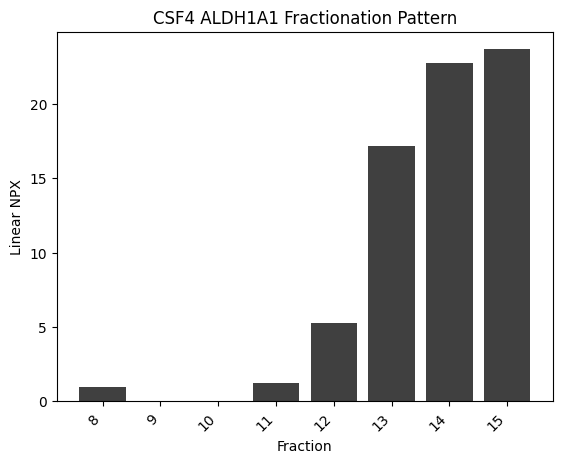

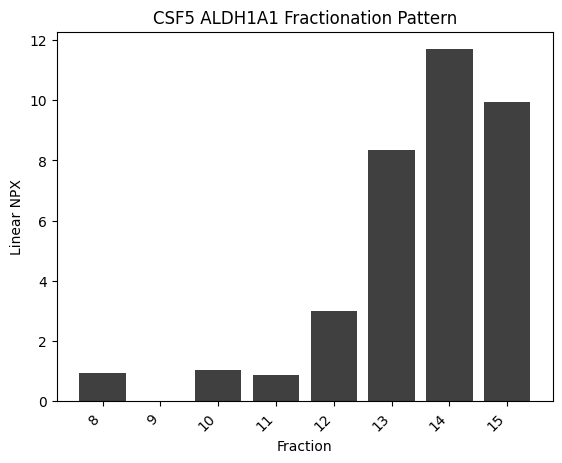

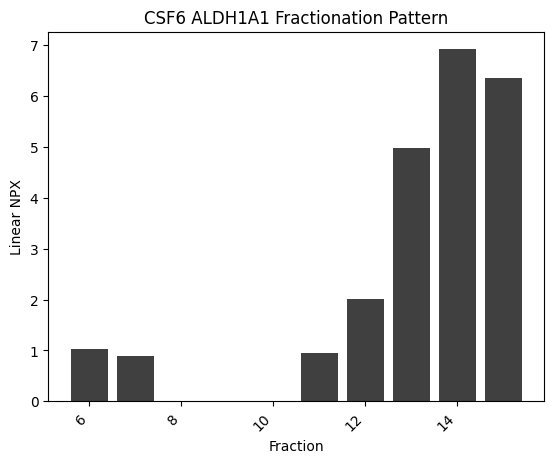

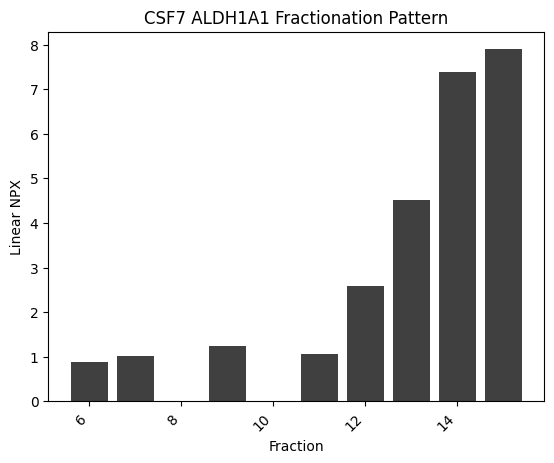

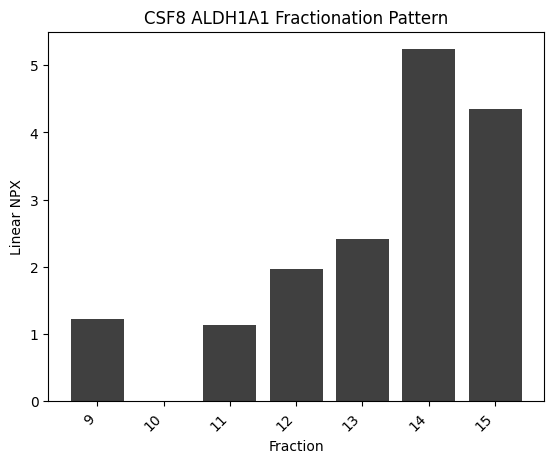

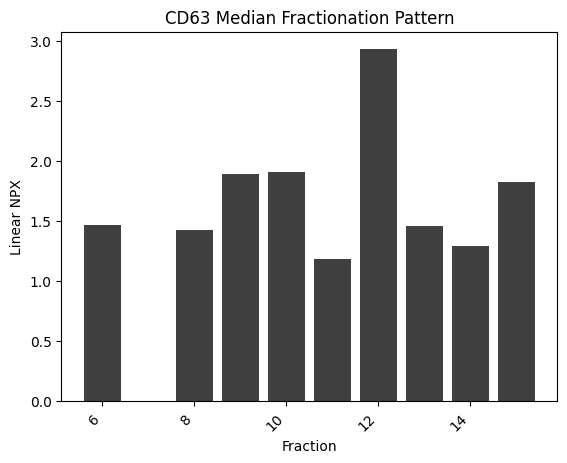

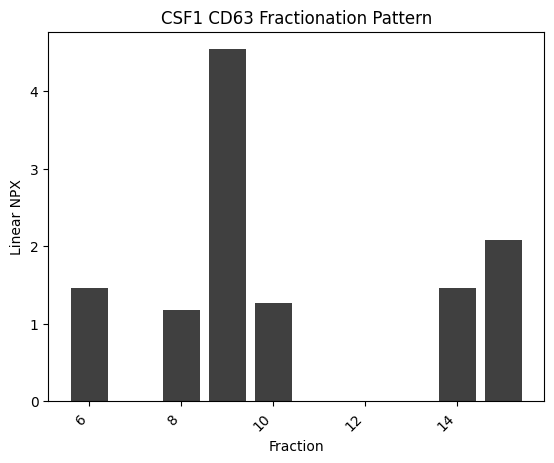

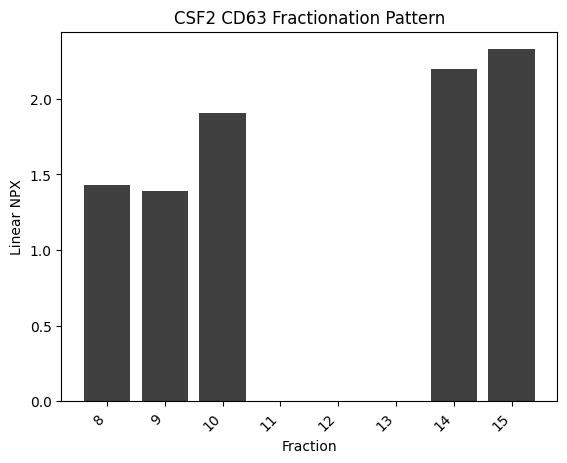

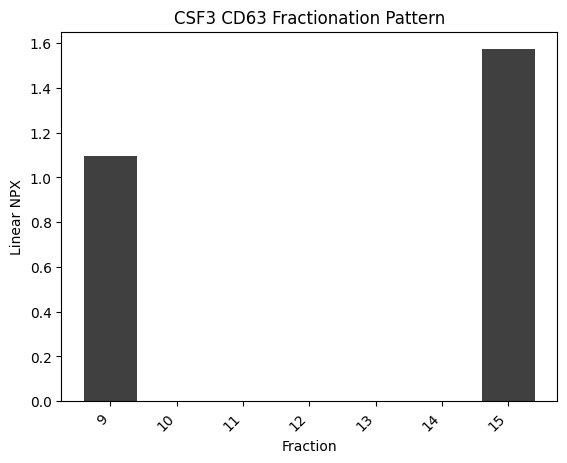

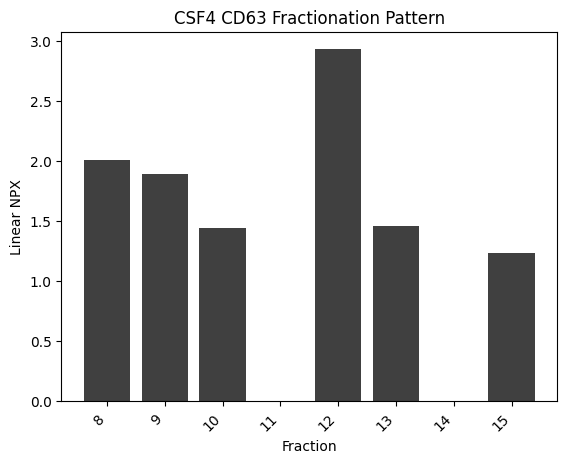

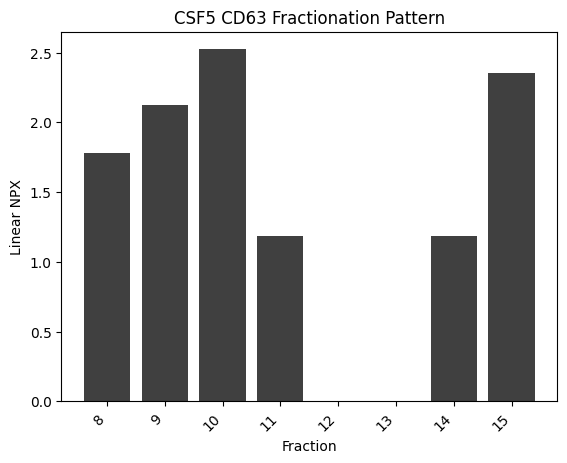

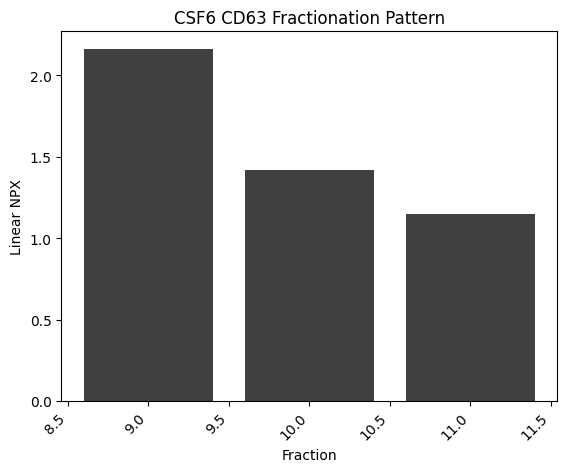

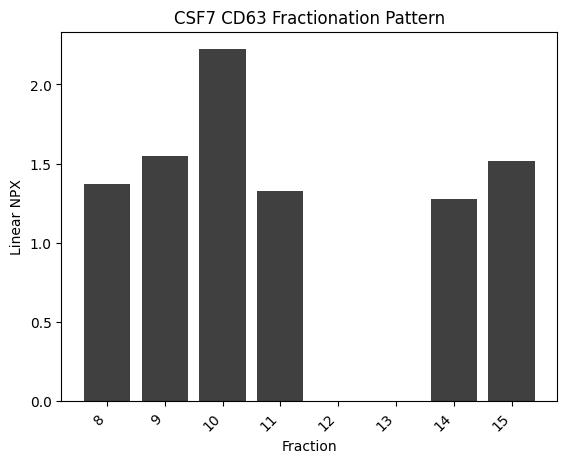

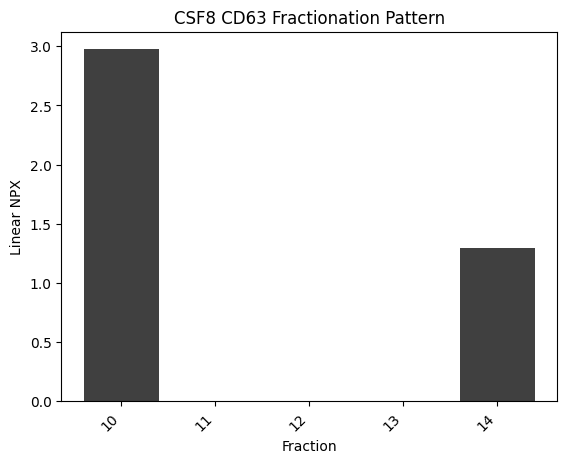

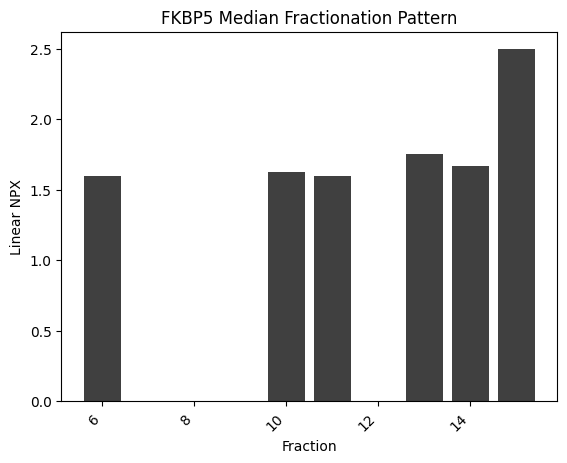

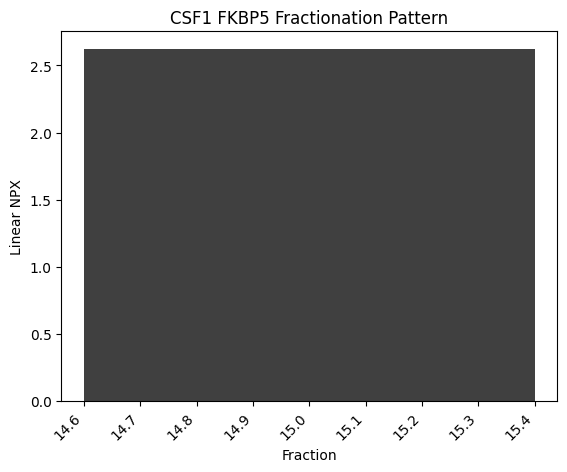

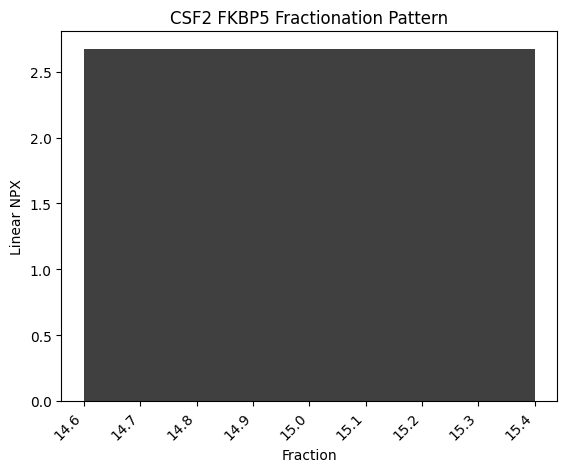

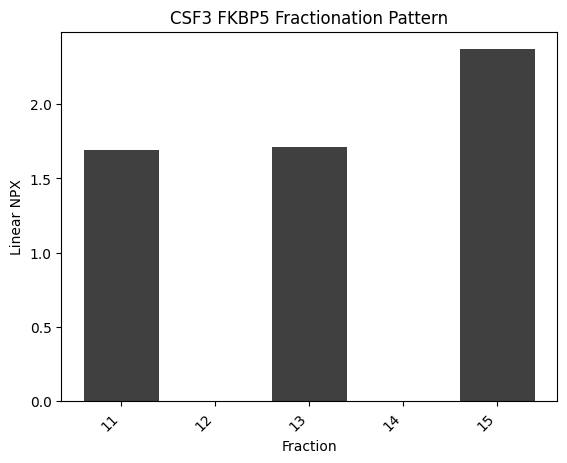

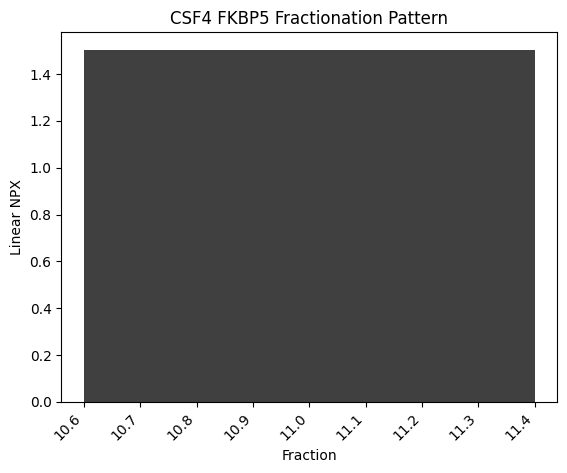

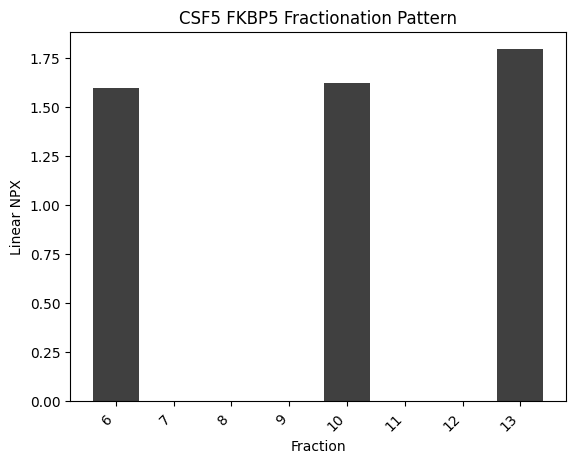

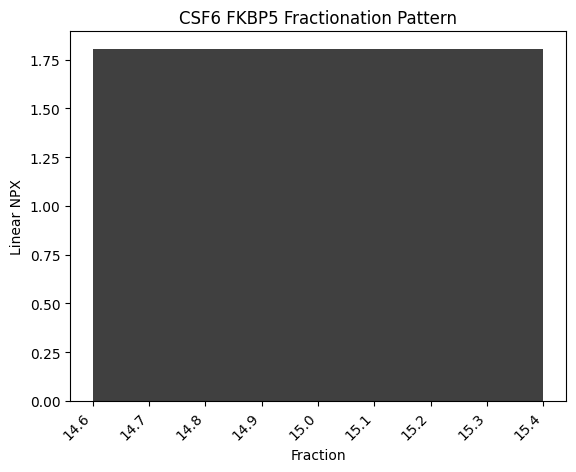

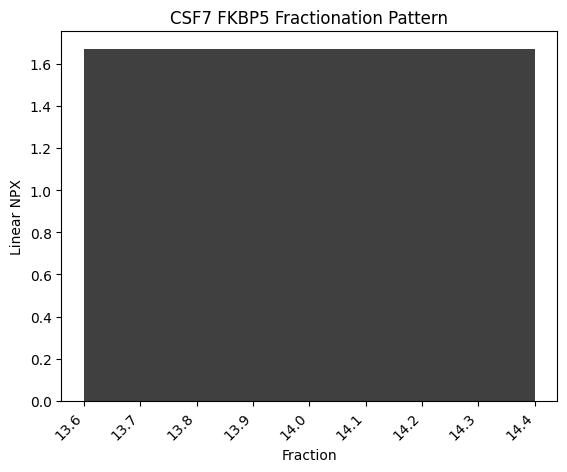

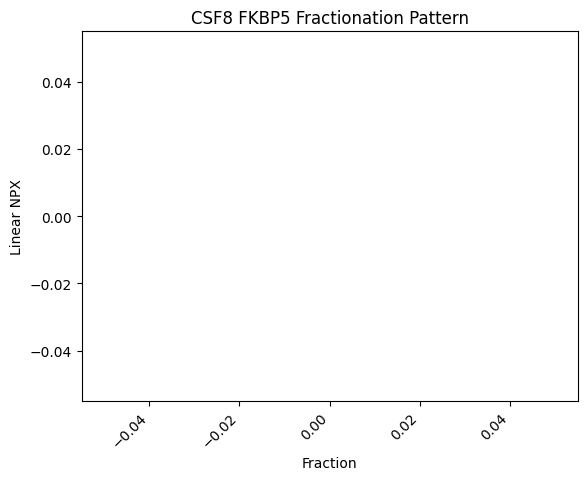

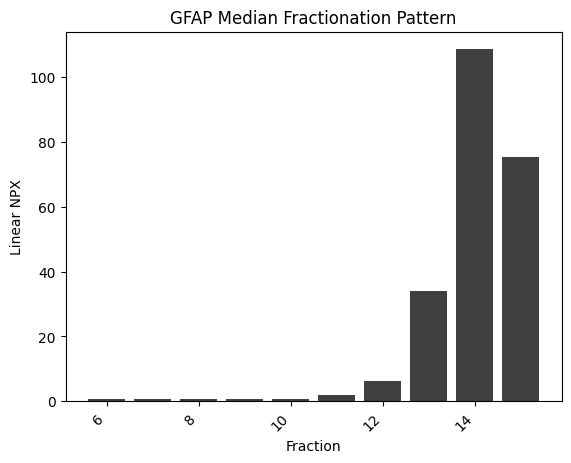

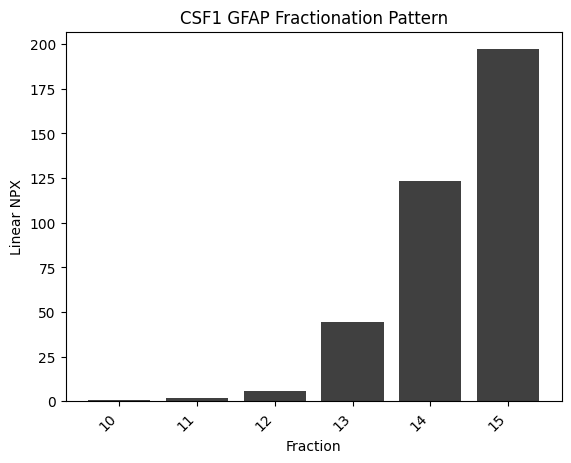

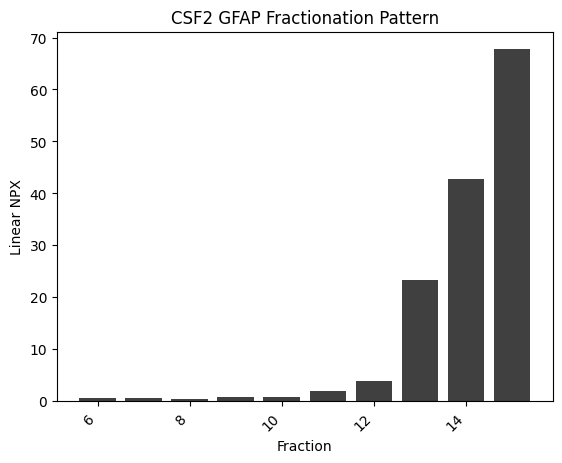

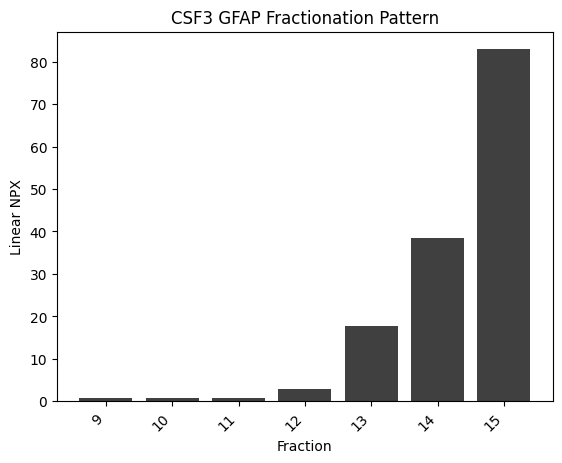

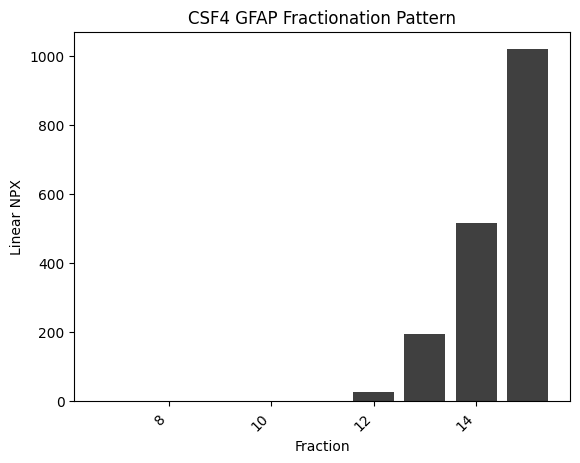

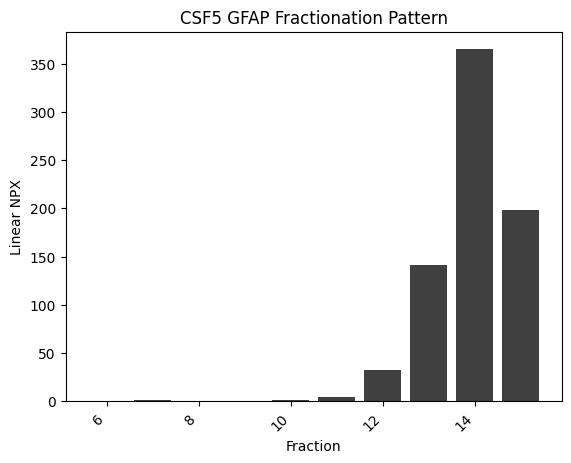

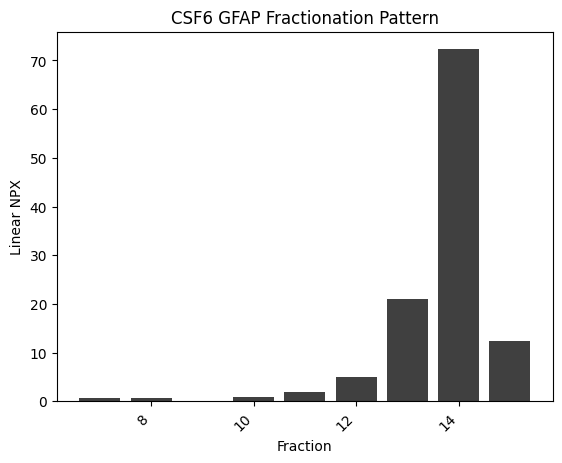

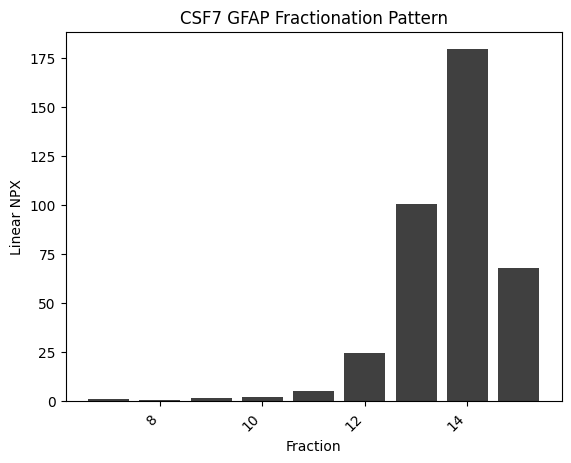

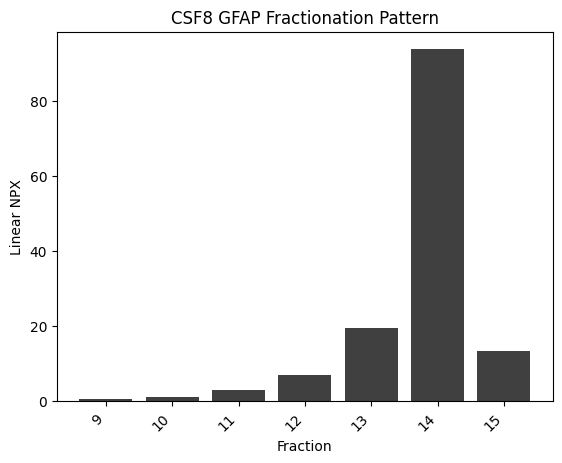

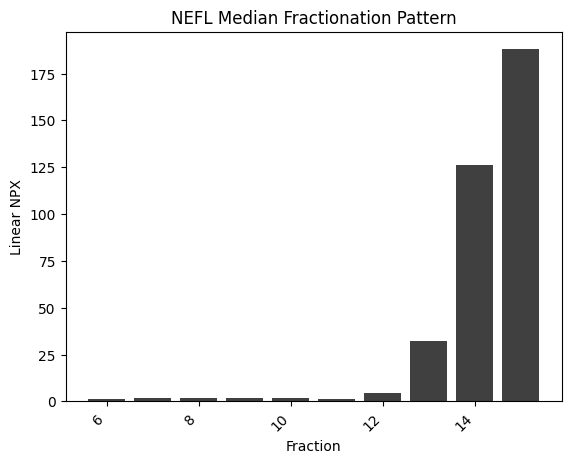

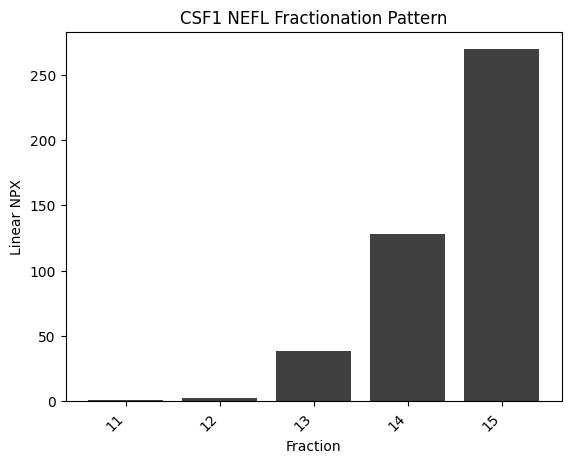

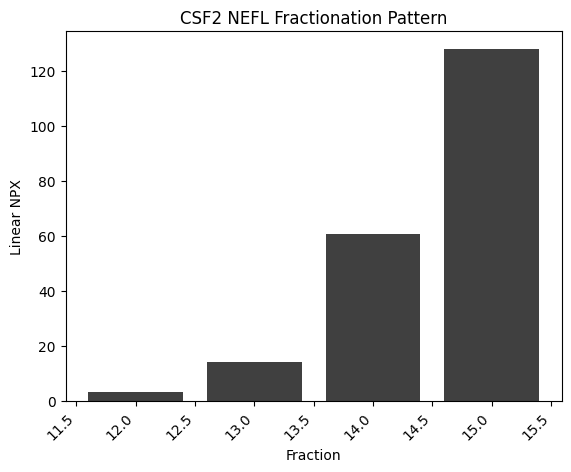

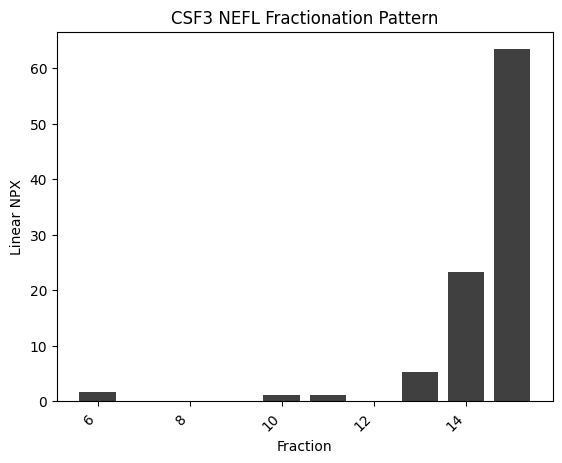

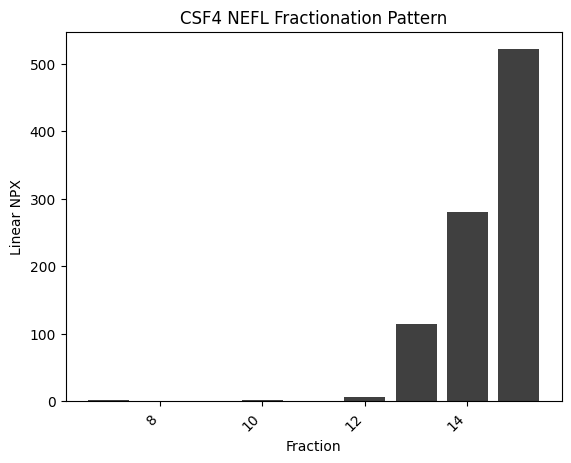

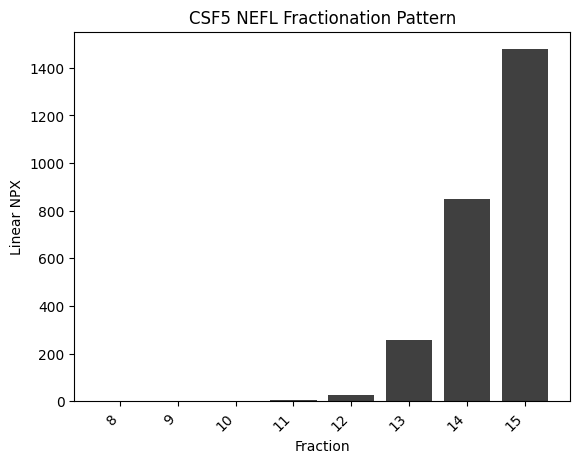

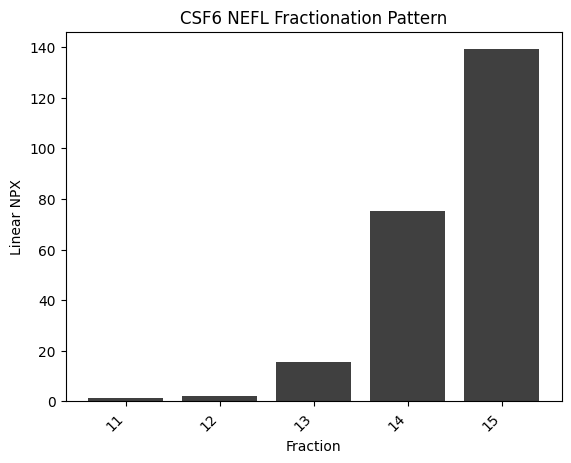

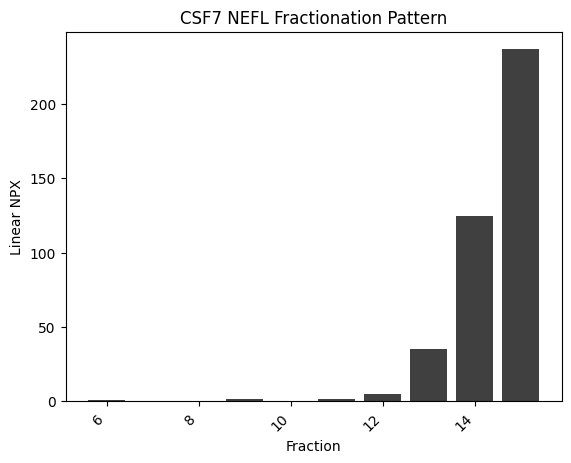

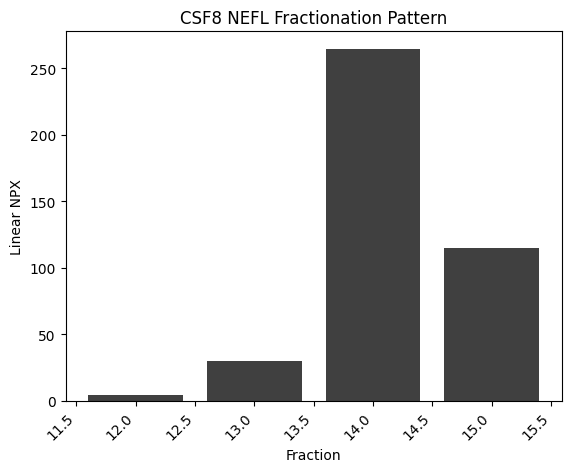

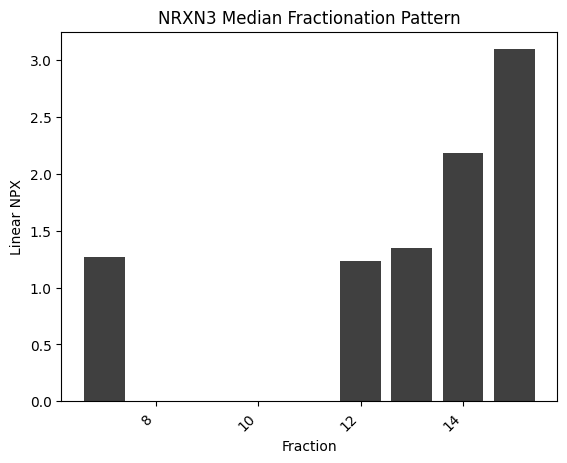

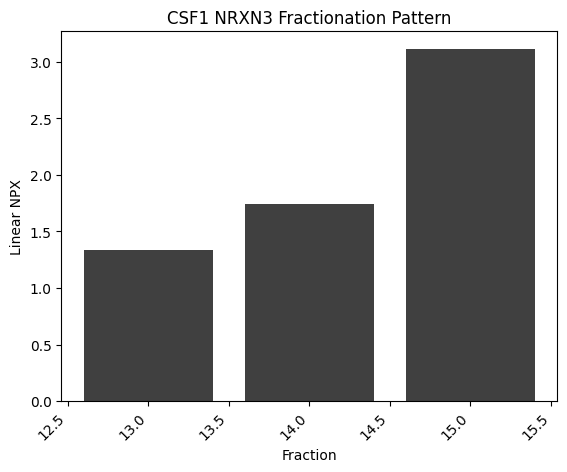

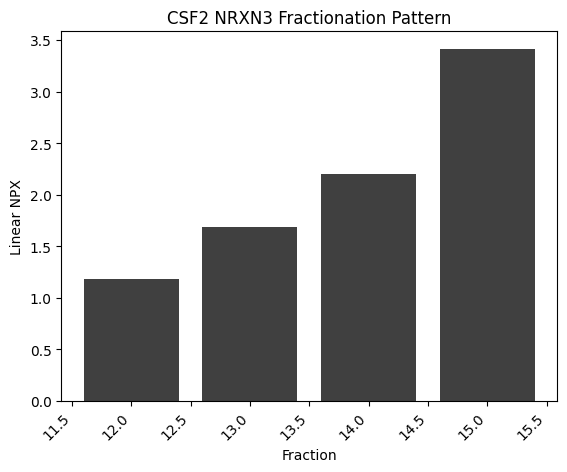

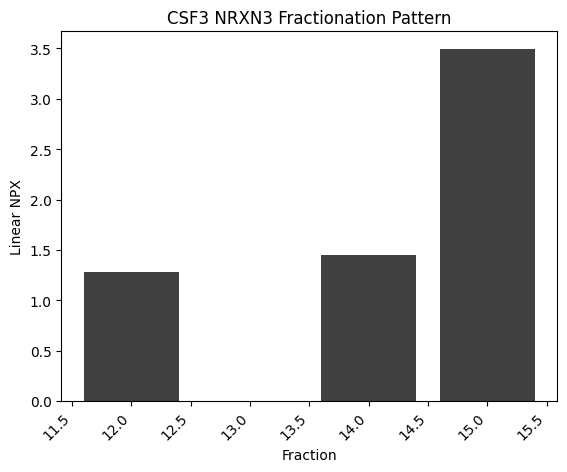

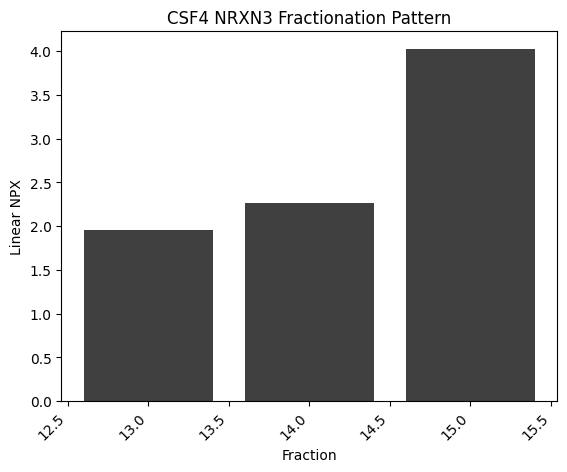

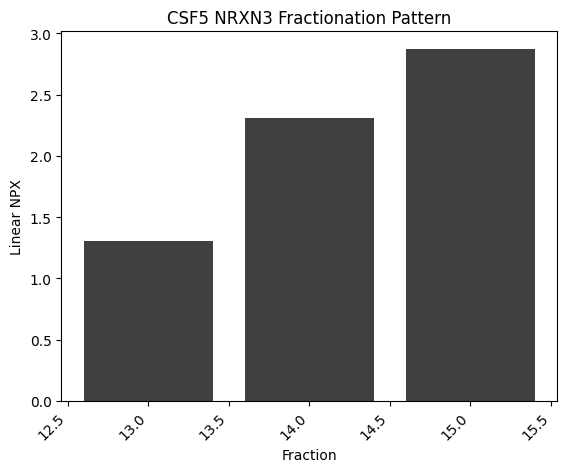

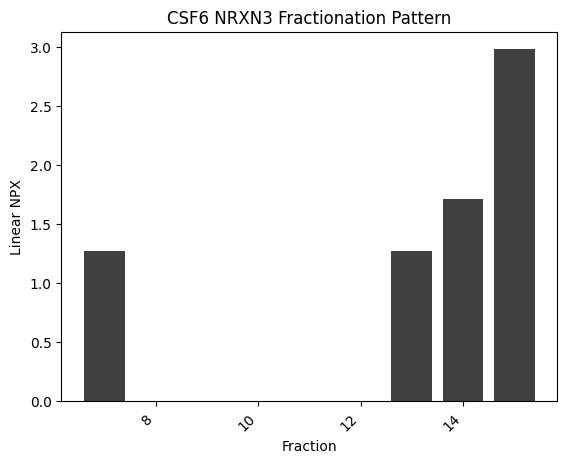

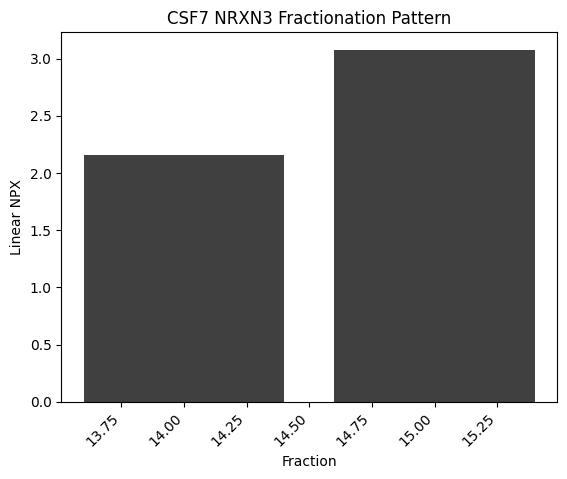

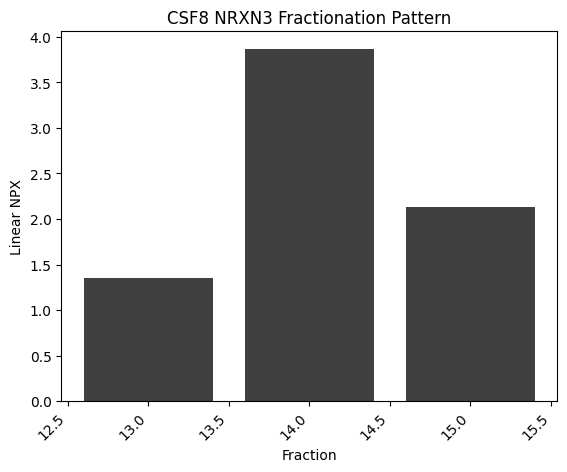

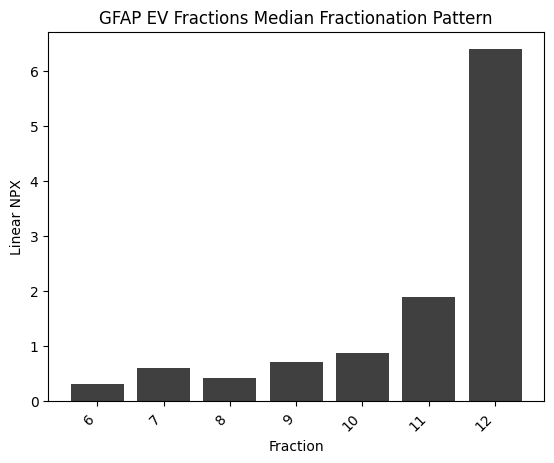

In [148]:
# verify data by searching for control targets with known fractionation patterns
filtered_npx = raw_data[
    (raw_data["NPX"] > raw_data["LOD"])
    & (raw_data["QC_Warning"] == "PASS")
    & (raw_data["Assay_Warning"] == "PASS")
]


def target_search(target):
    return raw_data[raw_data["Assay"] == target]


# filter and export the data for the control targets
aldh1a1 = target_search("ALDH1A1")
cd63 = target_search("CD63")
fkbp5 = target_search("FKBP5")
gfap = target_search("GFAP")
nefl = target_search("NEFL")
nrxn3 = target_search("NRXN3")

aldh1a1.to_excel(ALDH1A1_DATA_PATH)
cd63.to_excel(CD63_DATA_PATH)
fkbp5.to_excel(FKBP5_DATA_PATH)
nefl.to_excel(NEFL_DATA_PATH)
nrxn3.to_excel(NRXN3_DATA_PATH)


def plot_by_target(target):
    target_df = filtered_npx[
        (filtered_npx["Assay"] == target)
        & (filtered_npx["Sample Description"].str.contains("Fract"))
    ]
    medians = target_df.groupby("Sample Description")["Linear NPX"].median()
    medians.index = medians.index.map(lambda x: int(x.split()[-1]))
    medians = medians.sort_index()
    plt.bar(medians.index, medians, color="k", alpha=0.75)
    plt.xlabel("Fraction")
    plt.ylabel("Linear NPX")
    plt.title(f"{target} Median Fractionation Pattern")
    # plt.axhline(y = fract_df["LOD"][0], color = "red", linestyle = "--", label = "LOD")
    plt.xticks(rotation=45, ha="right")
    plt.show()
    for sample in CSF_SAMPLE_NUMBERS:
        sample_df = target_df[target_df["Sample Number"] == sample]
        sample_grouped = sample_df.groupby("Sample Description")["Linear NPX"].median()
        sample_grouped.index = sample_grouped.index.map(lambda x: int(x.split()[-1]))
        sample_grouped = sample_grouped.sort_index()
        plt.bar(sample_grouped.index, sample_grouped, color="k", alpha=0.75)
        plt.xlabel("Fraction")
        plt.ylabel("Linear NPX")
        plt.title(f"{sample} {target} Fractionation Pattern")
        plt.xticks(rotation=45, ha="right")
        plt.show()


for target in CONTROL_TARGETS:
    plot_by_target(target)

# check to see if GFAP is on EVs
gfap_ev_fractions = gfap[
    (gfap["Sample Description"].str.contains("Fract 6"))
    | (gfap["Sample Description"].str.contains("Fract 7"))
    | (gfap["Sample Description"].str.contains("Fract 8"))
    | (gfap["Sample Description"].str.contains("Fract 9"))
    | (gfap["Sample Description"].str.contains("Fract 10"))
    | (gfap["Sample Description"].str.contains("Fract 11"))
    | (gfap["Sample Description"].str.contains("Fract 12"))
]
medians = gfap_ev_fractions.groupby("Sample Description")["Linear NPX"].median()
medians.index = medians.index.map(lambda x: int(x.split()[-1]))
medians = medians.sort_index()
plt.bar(medians.index, medians, color="k", alpha=0.75)
plt.xlabel("Fraction")
plt.ylabel("Linear NPX")
plt.title("GFAP EV Fractions Median Fractionation Pattern")
plt.xticks(rotation=45, ha="right")
plt.show()

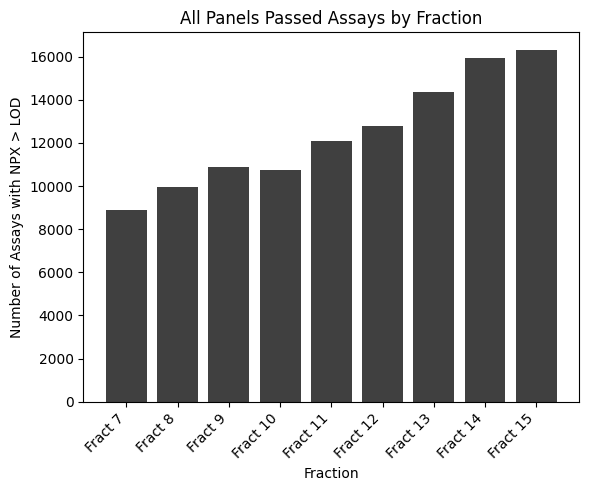

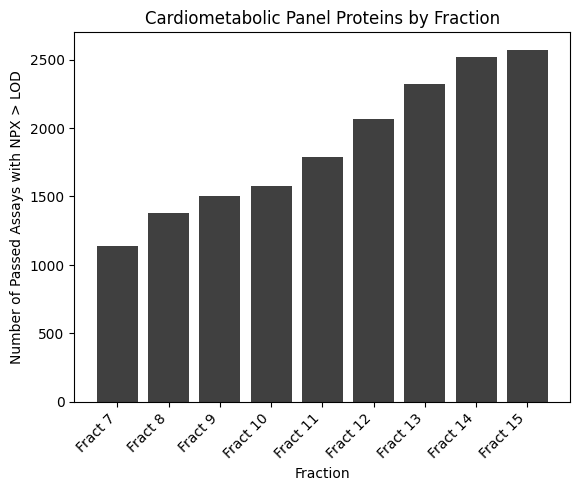

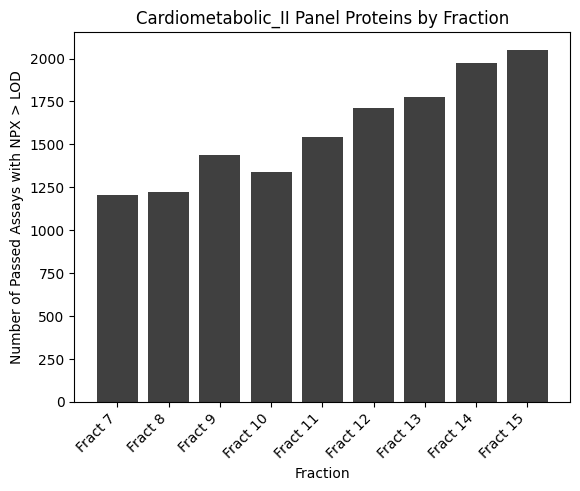

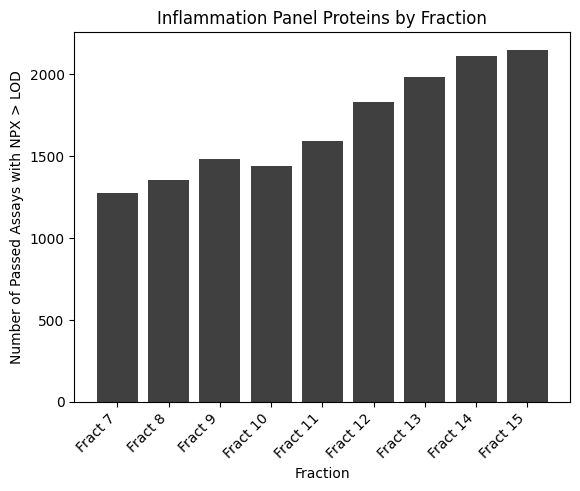

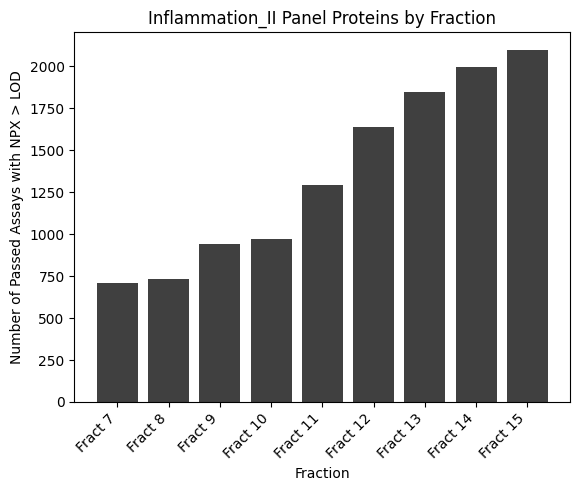

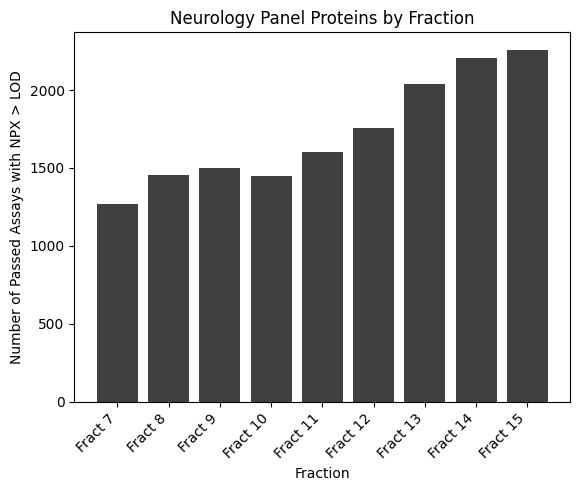

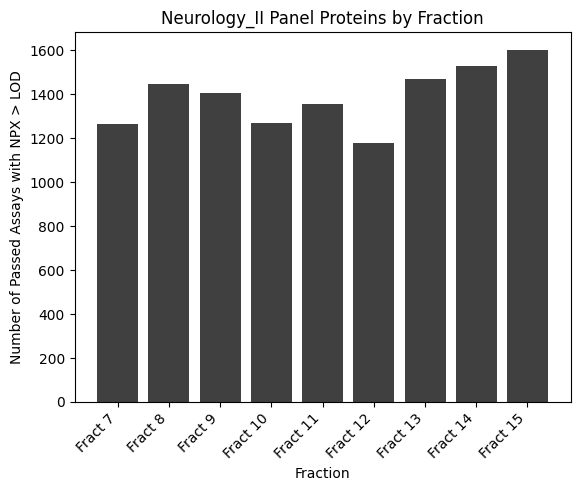

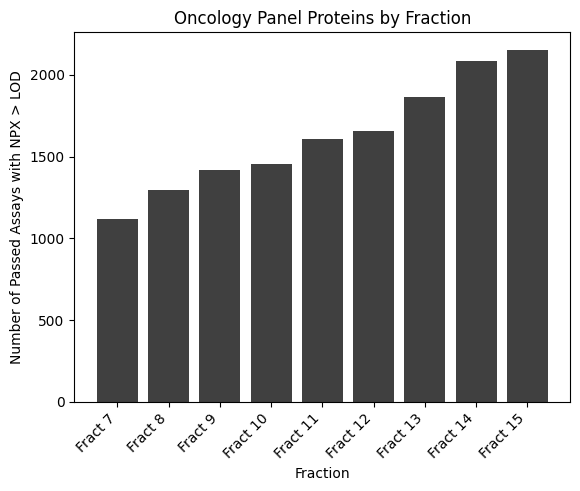

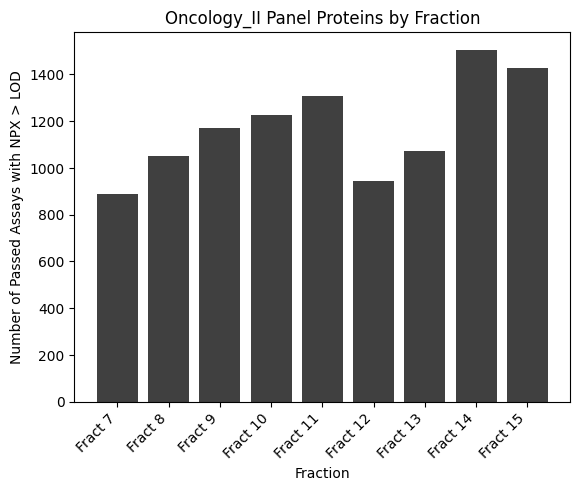

In [30]:
# plot of NPX values above 0 by panel

filtered_npx = raw_data[raw_data["NPX"] > raw_data["LOD"]]
filtered_npx = filtered_npx[filtered_npx["QC_Warning"] == "PASS"]
filtered_npx = filtered_npx[filtered_npx["Assay_Warning"] == "PASS"]


def plot_by_panel(panel):
    if panel in PANELS:
        npx = filtered_npx[filtered_npx["Panel"] == panel]
        counts = (npx["Sample Description"].value_counts()).reindex(X_AXIS_ORDER)
        plt.bar(counts.index, counts.values, color="k", alpha=0.75)
        plt.xlabel("Fraction")
        plt.ylabel("Number of Passed Assays with NPX > LOD")
        plt.title(f"{panel} Panel Proteins by Fraction")
        plt.xticks(rotation=45, ha="right")
        plt.show()
    else:
        fract_counts = (filtered_npx["Sample Description"].value_counts()).reindex(
            X_AXIS_ORDER
        )
        plt.bar(fract_counts.index, fract_counts.values, color="k", alpha=0.75)
        plt.xlabel("Fraction")
        plt.ylabel("Number of Assays with NPX > LOD")
        plt.title("All Panels Passed Assays by Fraction")
        plt.xticks(rotation=45, ha="right")
        plt.show()


plot_by_panel("all")
for panel in PANELS:
    plot_by_panel(panel)

In [31]:
# filter out data that did not pass QC and compare fractions 9 and 10 against 6 and 11
full_filter = raw_data[
    (raw_data["NPX"].astype(float) > raw_data["LOD"].astype(float))
    & (raw_data["QC_Warning"] == "PASS")
    & (raw_data["Assay_Warning"] == "PASS")
]

assay_list = full_filter["Assay"].unique()

good_targets_9_10_6_11 = []
for assay in assay_list:
    fract_9 = full_filter[
        (full_filter["Assay"] == assay)
        & (full_filter["Sample Description"].str.contains("9"))
    ]
    fract_9_median = fract_9["Linear NPX"].median()
    fract_10 = full_filter[
        (full_filter["Assay"] == assay)
        & (full_filter["Sample Description"].str.contains("10"))
    ]
    fract_10_median = fract_10["Linear NPX"].median()

    fract_6 = full_filter[
        (full_filter["Assay"] == assay)
        & (full_filter["Sample Description"].str.contains("6"))
    ]
    fract_6_median = fract_6["Linear NPX"].median()
    fract_11 = full_filter[
        (full_filter["Assay"] == assay)
        & (full_filter["Sample Description"].str.contains("11"))
    ]
    fract_11_median = fract_11["Linear NPX"].median()

    if (
        (fract_10_median > fract_6_median)
        and (fract_10_median > fract_11_median)
        and (fract_9_median > fract_6_median)
        and (fract_9_median > fract_11_median)
    ):
        good_targets_9_10_6_11.append(assay)

# combine with human protein atlas data and export
with open(
    "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\OLINK_Analysis_2.txt", "w"
) as file:
    for item in good_targets_9_10_6_11:
        file.write(item + "\n")

hpa_data = pd.read_csv(HPA_PATH, sep="\t")

ev_targets = hpa_data[hpa_data["Gene"].isin(good_targets_9_10_6_11)]

ev_targets.to_excel(SEC_DATA_PATH)

KeyboardInterrupt: 

In [52]:
healthy_late_fractions = raw_data[
    (
        (raw_data["Sample Description"].str.contains("Fract 15"))
        | (raw_data["Sample Description"].str.contains("Fract 14"))
    )
    & (raw_data["Additional Information"].str.contains("Healthy"))
]

print(healthy_late_fractions)

        SampleID Sample_Type UniProt                 Assay  MissingFreq  \
5       SM-N8JPO      SAMPLE    INC1  Incubation control 1          NaN   
7       SM-N8JPP      SAMPLE    INC1  Incubation control 1          NaN   
17      SM-N8JQ1      SAMPLE    INC1  Incubation control 1          NaN   
19      SM-N8JQ2      SAMPLE    INC1  Incubation control 1          NaN   
29      SM-N8JQD      SAMPLE    INC1  Incubation control 1          NaN   
...          ...         ...     ...                   ...          ...   
288691  SM-N8JQ2      SAMPLE  Q96R05                  RBP7       0.8977   
288701  SM-N8JQD      SAMPLE  Q96R05                  RBP7       0.8977   
288703  SM-N8JQE      SAMPLE  Q96R05                  RBP7       0.8977   
288713  SM-N8JQP      SAMPLE  Q96R05                  RBP7       0.8977   
288715  SM-N8JQQ      SAMPLE  Q96R05                  RBP7       0.8977   

                  Panel QC_Warning     LOD     NPX Assay_Warning  IntraCV  \
5       Cardiometaboli

In [51]:
ad_late_fractions = raw_data[
    (
        (raw_data["Sample Description"].str.contains("Fract 15"))
        | (raw_data["Sample Description"].str.contains("Fract 14"))
    )
    & (raw_data["Additional Information"].str.contains("AD"))
]

print(ad_late_fractions)

        SampleID Sample_Type UniProt                 Assay  MissingFreq  \
53      SM-N8JR2      SAMPLE    INC1  Incubation control 1          NaN   
55      SM-N8JR3      SAMPLE    INC1  Incubation control 1          NaN   
65      SM-N8JRE      SAMPLE    INC1  Incubation control 1          NaN   
67      SM-N8JRF      SAMPLE    INC1  Incubation control 1          NaN   
77      SM-N8JRQ      SAMPLE    INC1  Incubation control 1          NaN   
...          ...         ...     ...                   ...          ...   
288739  SM-N8JRF      SAMPLE  Q96R05                  RBP7       0.8977   
288749  SM-N8JRQ      SAMPLE  Q96R05                  RBP7       0.8977   
288751  SM-N8JRR      SAMPLE  Q96R05                  RBP7       0.8977   
288761  SM-N8JS3      SAMPLE  Q96R05                  RBP7       0.8977   
288763  SM-N8JS4      SAMPLE  Q96R05                  RBP7       0.8977   

                  Panel QC_Warning     LOD     NPX Assay_Warning  IntraCV  \
53      Cardiometaboli

In [115]:
# t-test to determine statistical significance of differences in late fractions AD v. healthy

assay_names = []
p_values = []


for assay in raw_data["Assay"].unique():
    subset = raw_data[raw_data["Assay"] == assay]
    healthy_late_fractions = subset[
        (
            (subset["Sample Description"].str.contains("Fract 15"))
            | (subset["Sample Description"].str.contains("Fract 14"))
        )
        & (subset["Additional Information"].str.contains("Healthy"))
    ]
    ad_late_fractions = subset[
        (
            (
                subset["Sample Description"].str.contains("Fract 15")
                | subset["Sample Description"].str.contains("Fract 14")
            )
        )
        & (subset["Additional Information"].str.contains("AD"))
    ]

    t_stat, p_value = stats.ttest_rel(
        healthy_late_fractions["Linear NPX"], ad_late_fractions["Linear NPX"]
    )

    assay_names.append(assay)
    p_values.append(p_value)

result_data = {"Assay": assay_names, "p-value": p_values}
result_df = pd.DataFrame(result_data)

sig_dif = result_df[result_df["p-value"] < 0.01]
# sig_dif = pd.merge(sig_dif, all_sums, on="Assay", how="left")
# filtered_sig_dif = sig_dif[sig_dif["EV Fractions"] > sig_dif["Late Fractions"]]

In [116]:
sig_dif.to_excel(
    "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\late fractions ad v. healthy 0.01 sig value.xlsx"
)

In [73]:
sig_dif

,Assay,p-value
126,FCRL1,0.000446
190,Amplification control 3,0.000017
231,MSMB,0.005876
299,Incubation control 4,0.000016
449,AMN,0.008215
503,CEACAM21,0.009175
553,CD70,0.004280
1307,ASAH2,0.004408
1479,LAMA1,0.003246
1492,RPS10,0.004138


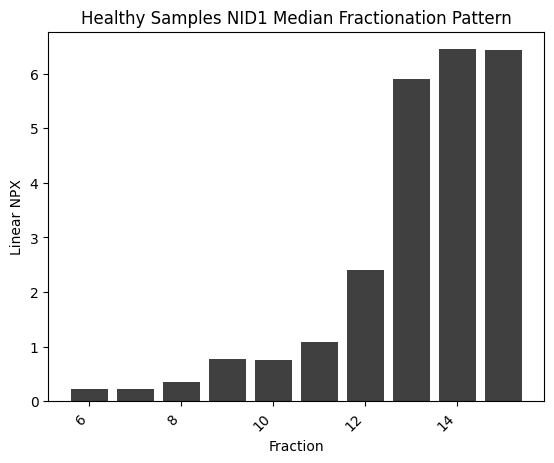

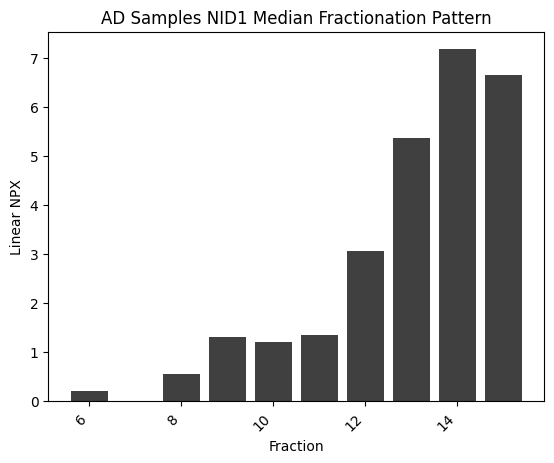

In [144]:
target = "NID1"

healthy_target_df = filtered_npx[
    (filtered_npx["Assay"] == target)
    & (filtered_npx["Sample Description"].str.contains("Fract"))
    & (filtered_npx["Additional Information"].str.contains("Healthy"))
]

medians = healthy_target_df.groupby("Sample Description")["Linear NPX"].median()
medians.index = medians.index.map(lambda x: int(x.split()[-1]))
medians = medians.sort_index()
plt.bar(medians.index, medians, color="k", alpha=0.75)
plt.xlabel("Fraction")
plt.ylabel("Linear NPX")
plt.title(f"Healthy Samples {target} Median Fractionation Pattern")
plt.xticks(rotation=45, ha="right")
plt.show()

ad_target_df = filtered_npx[
    (filtered_npx["Assay"] == target)
    & (filtered_npx["Sample Description"].str.contains("Fract"))
    & (filtered_npx["Additional Information"].str.contains("AD"))
]
medians = ad_target_df.groupby("Sample Description")["Linear NPX"].median()
medians.index = medians.index.map(lambda x: int(x.split()[-1]))
medians = medians.sort_index()
plt.bar(medians.index, medians, color="k", alpha=0.75)
plt.xlabel("Fraction")
plt.ylabel("Linear NPX")
plt.title(f"AD Samples {target} Median Fractionation Pattern")
plt.xticks(rotation=45, ha="right")
plt.show()

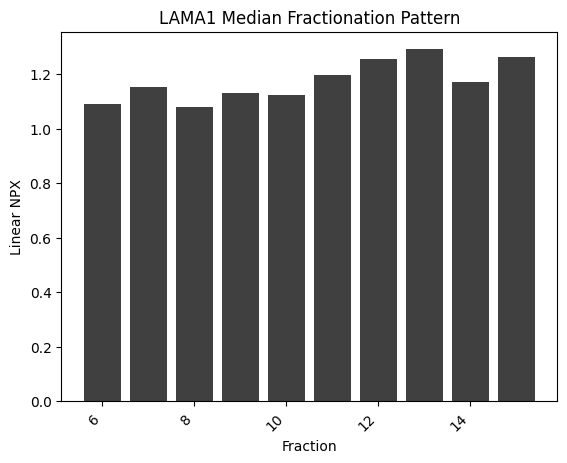

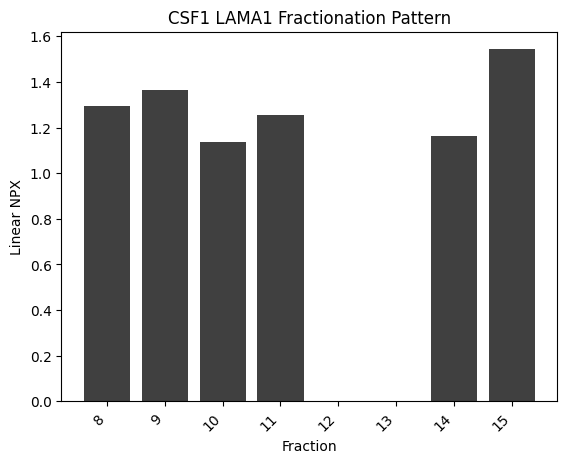

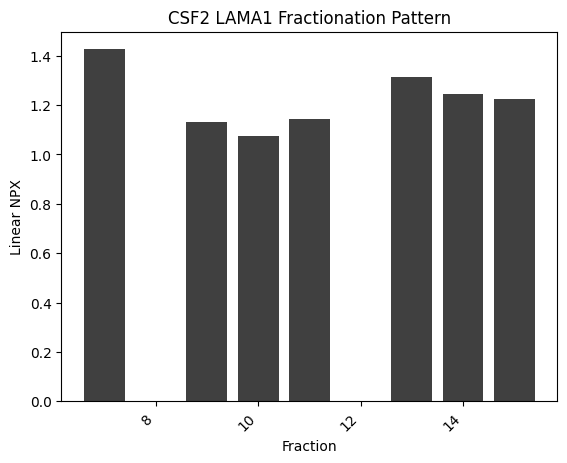

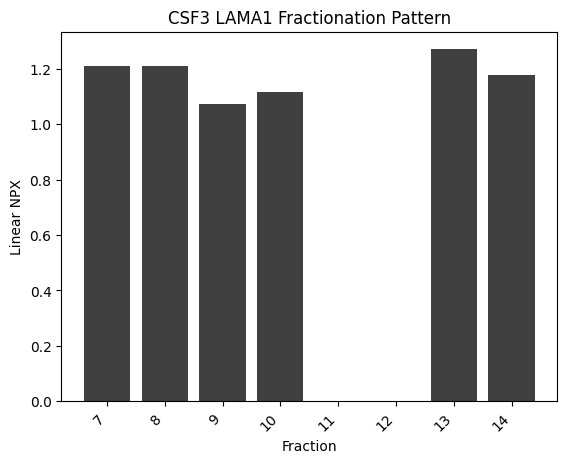

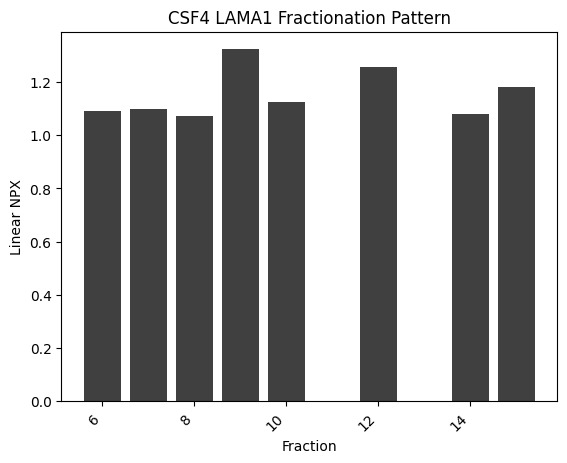

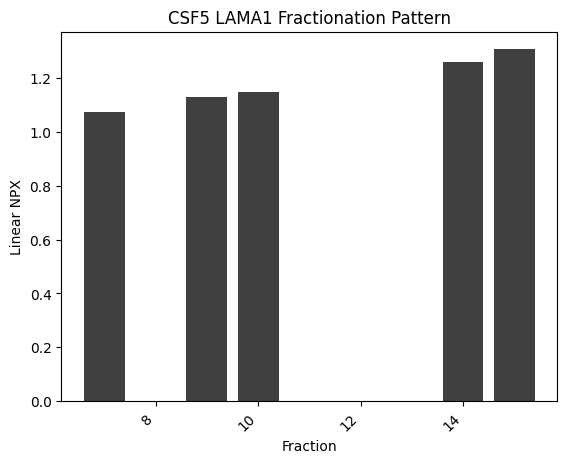

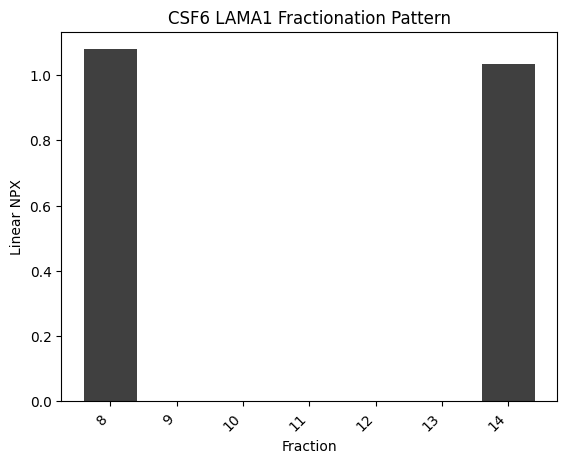

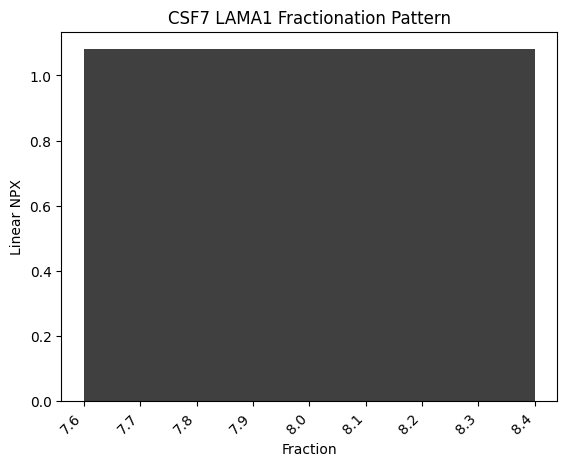

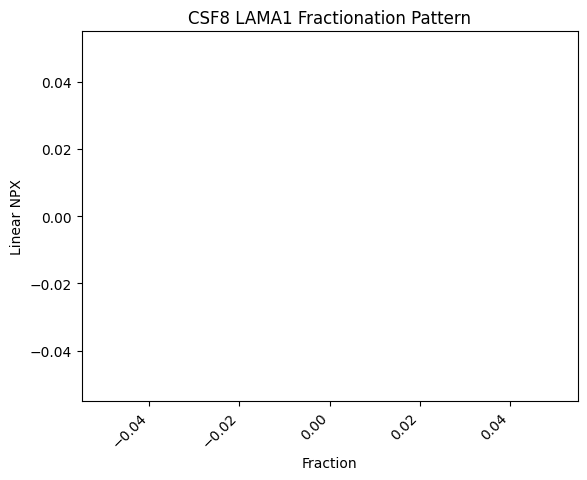

In [126]:
plot_by_target("LAMA1")

In [117]:
# t-test to determine statistical significance of differences in EV fractions AD v. healthy

assay_names = []
p_values = []


for assay in raw_data["Assay"].unique():
    subset = raw_data[raw_data["Assay"] == assay]
    healthy_late_fractions = subset[
        (
            (subset["Sample Description"].str.contains("Fract 9"))
            | (subset["Sample Description"].str.contains("Fract 10"))
        )
        & (subset["Additional Information"].str.contains("Healthy"))
    ]
    ad_late_fractions = subset[
        (
            (
                subset["Sample Description"].str.contains("Fract 9")
                | subset["Sample Description"].str.contains("Fract 10")
            )
        )
        & (subset["Additional Information"].str.contains("AD"))
    ]

    t_stat, p_value = stats.ttest_rel(
        healthy_late_fractions["Linear NPX"], ad_late_fractions["Linear NPX"]
    )

    assay_names.append(assay)
    p_values.append(p_value)

result_data2 = {"Assay": assay_names, "p-value": p_values}
result_df2 = pd.DataFrame(result_data2)

sig_dif2 = result_df2[result_df2["p-value"] < 0.01]

In [108]:
sig_dif2

,Assay,p-value
1,Amplification control 1,0.018872
15,HEBP1,0.043966
22,CRX,0.035983
36,CEP43,0.016170
50,THPO,0.014509
...,...,...
2917,NFU1,0.045665
2922,PALM,0.007219
2927,JPT2,0.015945
2932,CETN3,0.034380


In [118]:
sig_dif2.to_excel(
    "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\ev fractions ad v. healthy 0.01 sig value.xlsx"
)

In [119]:
overlap_values = list(set(sig_dif["Assay"]).intersection(sig_dif2["Assay"]))

In [120]:
overlap_values

['Incubation control 4', 'ACSL1', 'LAMA1']

Meething with Adnan 11/8
we don't have one plate with 3072 targets, we have 8 plates of 384 targets each with their own control
create separate dataframes for each of the eight panels
each plate has a negative control to establish the background for no RNA input (olink is RNA based)
for each panel, pull out the control NPX values
there are three types of controls: incubation, negative, and amplification (positive)
we don't really have to do anything with the positive control, just tells us that the experiment worked
negative control is also an amplification control, but should hyothetically be equal to zero
take linear NPX and subtract the negative control from it to make a new dataset (delta, first normalization)
take the previous dataset and subtract the incubation control from the new NPX value (delta delta, total normalization)
separate the fractions from the internal pool from PPA to make two separate dataframes
plot the following: 
-- x axis: fraction and internal (one point for CSF and one point for plasma)
-- y axis: CD63 median NPX emphasized with nonemphasized points for the NPX of the non-median values, color code for AD vs. healthy
-- don't include plasma samples
add an internal data point for the plots of assays above NPX by panel (CSF)
target selection: 
-- look at all the data and divide into three separate transmembrane and cytosolic and soluble dataframes (take a list of transmembrane proteins and look at everything else to make the cytosolic/soluble dataframe, ask Dima for transmembrane database, Adnan will look for soluble protein dataset); prioritize the transmembrane and cytosolic targets; overlap with brain rna seq and gtex data for brain/cell type specific targets
make diagram of number of targets as they are filtered out 
--- pick 5-10 top targets, look at internal sample (post-PPA) of both CSF and plasma to see how highly enriched it is
---- check for isoforms of selected targets, double check that it is cytosolic/transmembrane, look for previous publications and see if it matches